<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/12_class_Clustering_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 
%matplotlib inline

In [ ]:
iris =load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


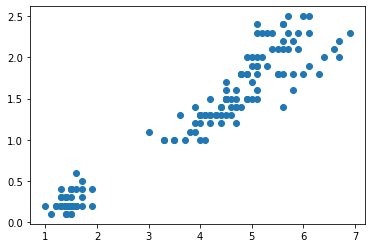

In [ ]:
petals = pd.DataFrame(iris_data_pd.values[:,2:4], columns = ['petal length (cm)','petal width (cm)'])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

K Means import

In [ ]:
from sklearn.cluster import KMeans

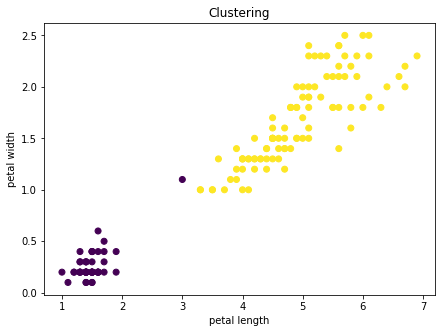

In [ ]:
plt.figure(figsize = (7, 5))
km = KMeans(n_clusters = 2, random_state= 20)
km.fit(iris_data_pd.iloc[:,2:4])
y_pred = km.predict(iris_data_pd.iloc[:,2:4])

plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Clustering") 
plt.xlabel('petal length') 
plt.ylabel('petal width')

plt.show()

저 애매한 보라색 점이 왜 보라색인지 알아보기

In [ ]:
print (km.predict(iris_data_pd.iloc[:,2:4]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print(iris_data_pd.iloc[98, 2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [ ]:
from sklearn import cluster
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [ ]:
count = pd.DataFrame(km.predict(iris_data_pd.iloc[:, 2:4]), columns = ['value'])
print(count.loc[count['value'] == 0])

     value
110      0
111      0
112      0
114      0
115      0
139      0
141      0
145      0
147      0
148      0


보라색기준점 노란색기준점으로부터의 euclidian 거리 계산

In [ ]:
def distance(x1, y1, x2, y2):
 dx = x2 - x1 
 dy = y2 - y1 
 squared = dx**2 + dy**2
 result = math.sqrt(squared)
 return result

print('0 cluster distance:', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print('1 cluster distance:', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))

print('0 cluster distance 랑 더 가까움')

0 cluster distance: 1.7246990164733285
1 cluster distance: 2.0112458036464465
0 cluster distance 랑 더 가까움


클러스터의 분류 갯수 바꿔보면서 확인

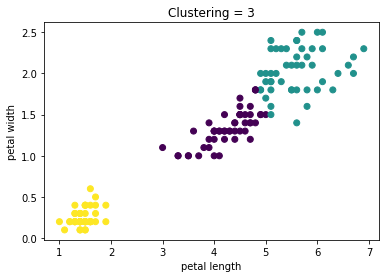

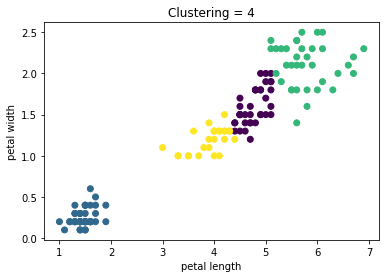

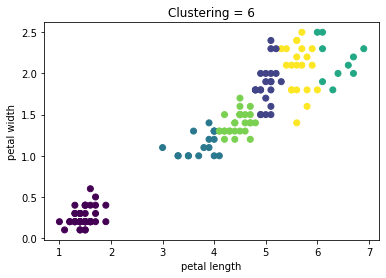

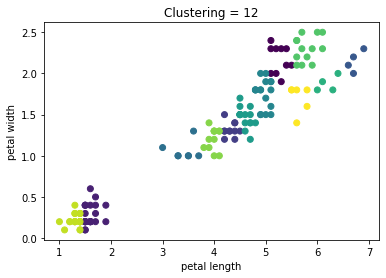

In [ ]:
n_cluster = [3, 4, 6, 12]

for i in n_cluster:
  count = 1
  km = KMeans(n_clusters = i, random_state=20)
  km.fit(iris_data_pd.iloc[:, 2:4])
  y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
  plt.figure(count)
  plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
  plt.title("Clustering = "+ str(i)) 
  plt.xlabel('petal length') 
  plt.ylabel('petal width') 
  count=count+1 
  plt.show()

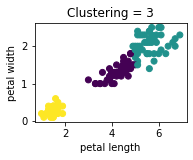

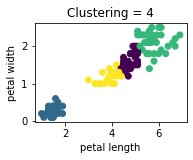

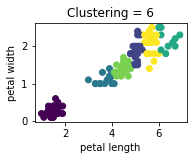

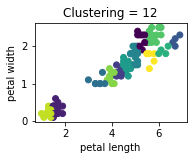

In [ ]:
n_cluster = [3, 4, 6, 12]

for i in n_cluster:
  count = 1
  km = KMeans(n_clusters = i, random_state=20)
  km.fit(iris_data_pd.iloc[:, 2:4])
  y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
  plt.subplot(2,2,count)
  plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
  plt.title("Clustering = "+ str(i)) 
  plt.xlabel('petal length') 
  plt.ylabel('petal width') 
  count=count+1 
  plt.show()

클러스터들을 각영역별로 쪼개어 포시할 수 있는 voronoi 그래프 묘사

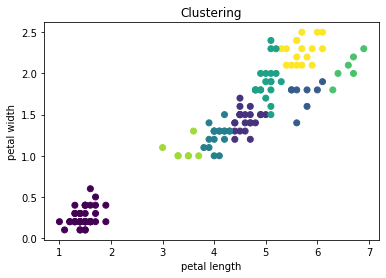

In [ ]:
km12 = KMeans(n_clusters = 8, random_state= 20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:, 3], c= y_pred12)
plt.show()

In [ ]:
h= .02 # mesh grid 간격 

km12 = KMeans(n_clusters = 8, random_state= 20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])

In [ ]:
# 바운더리, 이따 색칠하기위해

h= .02

x_min, x_max = iris_data_pd.iloc[:,2].min() -1, iris_data_pd.iloc[:,2].max() +1
y_min, y_max = iris_data_pd.iloc[:,3].min() -1, iris_data_pd.iloc[:,3].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


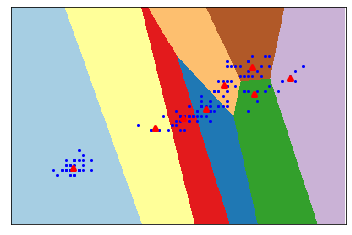

In [ ]:
# 컬러 입히기
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
plt.figure(1) 
plt.clf() 
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize=2)


# 기준점 표시
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max)
plt.xticks(()) 
plt.yticks(())
plt.show()

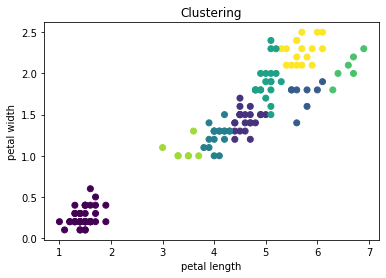

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


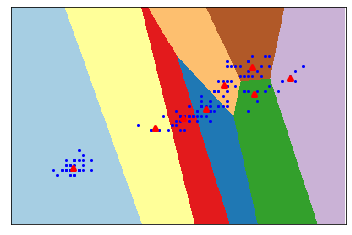

In [ ]:
# graph1
km12 = KMeans(n_clusters = 8, random_state= 20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])

plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:, 3], c= y_pred12)
plt.show()


# graph2
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
plt.figure(1)  
plt.clf() 
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize=2)

centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)  
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max)
plt.xticks(()) 
plt.yticks(())
plt.show()

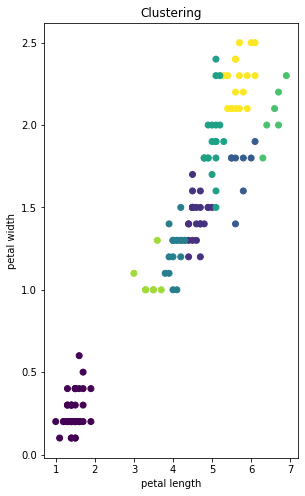

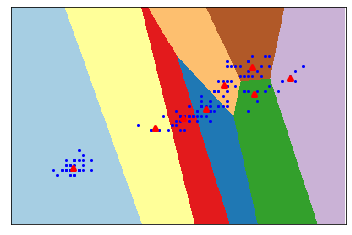

In [ ]:
# plt.figure(figsize=(10,8))

km12 = KMeans(n_clusters = 8, random_state= 20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1) 
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:, 3], c= y_pred12)
plt.show()


# 컬러 입히기
Z = z.reshape(xx.shape)
# plt.figure(1) 
plt.subplot(1, 2, 2) 
plt.clf() 
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', 
origin='lower') 
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize=2)


# 기준점 표시
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)  
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max)
plt.xticks(()) 
plt.yticks(())
plt.show()

